##  Chemistry Module - Visualizing Atomic Orbitals Using Programming

**Estimated Time:** 15-30 minutes <br>
**Notebook Developed By:** Lan Dinh <br>

Welcome! This notebook will help you understand and visualize atomic orbitals using Python programming. By the end of this lesson, you will be able to plot wave functions of different orbitals and gain insights into their shapes and properties.

One source for this notebook is:  
https://weisscharlesj.github.io/SciCompforChemists/notebooks/chapter_03/chap_03_notebook.html

**Note: To run a cell, first move your cursor over it and click once. After that, press `Ctrl + Enter` on your keyboard. Remember to run the cells sequentially from top to bottm of this notebook to avoid errors.**


### Learning Outcomes
By the end of this notebook, you will:
- Calculate and visualize the radial wavefunctions $R_{nl}(r)$ for hyrogen orbitals 1s, 2s, 3s, 2p, 3p, and  3d.
- Visualize and compare the angular shapes of $s$, $p_{x}$, $d_{xy}$, and $d_{z^2}$ orbitals in polar coordinates.
  
### Table of Contents
1. Context Background <br>
2. Radial Wavefunctions<br>
2.1. Mathematical Definitions<br>
2.2.  Python Implementation<br>
3. Angular Wavefuncions in Polar Coordinates <br>
3.1. Mathematical Definitions<br>
3.2.  Python Implementation<br>

------------------
## Run the cell below to import all our required materials for this notebook!

In [48]:
import matplotlib.pyplot as plt
import math
import numpy as np
from ipywidgets import interact, widgets
%matplotlib inline  

## 1. Context Background

Atomic orbitals are fundamental concepts in quantum chemistry and atomic physics, describing the regions in an atom where electrons are most likely to be found. Understanding the shapes and properties of these orbitals is crucial for comprehending chemical bonding, electron configurations, and the behavior of atoms in various chemical reactions.

Traditional methods of teaching atomic orbitals often rely on static images and mathematical equations, which can be abstract and challenging for students to visualize and grasp. However, with the advent of programming and computational tools, we can create dynamic visualizations that bring these abstract concepts to life.

This module aims to leverage the power of Python programming to visualize atomic orbitals, making the learning process more interactive and engaging. By combining theoretical principles with practical coding exercises, students can gain a deeper understanding of the spatial distributions and characteristics of different orbitals.

## 2. Radial Wavefunctions

<!-- The 3s atomic orbital of hydrogen is a specific region around the nucleus where there is a high probability of finding an electron. This region is defined by two key quantum numbers: the principal quantum number ($𝑛=3$) and the angular momentum quantum number ($l=0$). These quantum numbers give us information about the size and shape of the orbital.

 ### 2.1. 3s Orbital Wave Function
A wave function, denoted as $\psi$, is a mathematical equation that describes the behavior and location of an electron in an atom. For the 3s orbital, the wave function is written as  $\psi_{3s}$. This function tells us how the electron's probability of being found at a certain distance from the nucleus changes as we move away from the nucleus.
The following equation defines the wave function ($\psi$) for the 3s atomic orbital of hydrogen with respect to atomic radius ($r$) in Bohrs ($a_0$).

$$ \psi_{3s} = \frac{2}{27}\sqrt{3}(2r^{2/9} - 2r + 3)e^{-r/3} $$

Here:

- $r$ is the distance from the nucleus.

- The expression inside the parentheses $ \frac{2r^2}{9} - 2r + 3 $ shows how the probability changes with distance.

- The exponential term $e^{-\frac{r}{3}}$ shows how the probability decreases as we move farther from the nucleus. -->

### 2.1. Radial Wavefunctions: Mathematical Definitions

#### Constants
The following constants are used in the calculations:
- **$a_0 = 52.92 \, \mathrm{pm}$**: The Bohr radius, representing the average distance of an electron in the ground state of hydrogen.
- **$Z = 1$**: The atomic number of hydrogen, which has one proton in the nucleus.

#### Radial Wavefunctions
The radial wavefunctions $R_{nl}(r)$ describe the radial part of the wavefunction for hydrogen orbitals. These functions depend on the principal quantum number $n$, orbital angular momentum quantum number $l$, and the distance $r$ from the nucleus.

#### General Formula
Each radial wavefunction has the general form:
$$
R_{nl}(r) = f(r, Z, a_0) \cdot e^{-\sigma / 2},
$$
where:
- **$\sigma = \frac{2Zr}{n a_0}$**: A dimensionless parameter scaling with the distance $r$.
- **$f(r, Z, a_0)$**: A polynomial factor specific to each orbital.
- **$e^{-\sigma / 2}$**: Exponential decay, representing the decrease in wavefunction amplitude as distance increases.

#### Specific Radial Wavefunctions
The following are the specific radial wavefunctions for hydrogen orbitals:

- **$1s$ Orbital**
$$
R_{1s}(r) = 2 \left( \frac{Z}{a_0} \right)^{3/2} e^{-\sigma / 2},
$$
where $\sigma = \frac{2Zr}{a_0}$.

- **$2s$ Orbital**
$$
R_{2s}(r) = \frac{1}{2\sqrt{2}} \left( \frac{Z}{a_0} \right)^{3/2} (2 - \sigma) e^{-\sigma / 2},
$$
where $\sigma = \frac{Zr}{a_0}$.

- **$3s$ Orbital**
$$
R_{3s}(r) = \frac{1}{9\sqrt{3}} \left( \frac{Z}{a_0} \right)^{3/2} (6 - 6\sigma + \sigma^2) e^{-\sigma / 2},
$$
where $\sigma = \frac{2Zr}{3a_0}$.

- **$2p$ Orbital**
$$
R_{2p}(r) = \frac{1}{2\sqrt{6}} \left( \frac{Z}{a_0} \right)^{3/2} \sigma e^{-\sigma / 2},
$$
where $\sigma = \frac{Zr}{a_0}$.

- **$3p$ Orbital**
$$
R_{3p}(r) = \frac{1}{9\sqrt{6}} \left( \frac{Z}{a_0} \right)^{3/2} \sigma (4 - \sigma) e^{-\sigma / 2},
$$
where $\sigma = \frac{2Zr}{3a_0}$.

- **$3d$ Orbital**
$$
R_{3d}(r) = \frac{1}{9\sqrt{30}} \left( \frac{Z}{a_0} \right)^{3/2} \sigma^2 e^{-\sigma / 2},
$$
where $\sigma = \frac{2Zr}{3a_0}$.


### 2.2. Radial Wavefunctions: Python 
Now, let's translate the mathematical formulas into Python code. The code cell below implements the radial wavefunctions for each orbital using the equations presented earlier.

Each function corresponds to the formula provided above (e.g., radial_1s for $R_{1s}(r)$) and calculates the value of the radial wavefunction at a given distance r. 

Run the cell below to define these functions

In [25]:
## Run this cell

# Constants
a0 = 52.92  # Bohr radius in pm
Z = 1  # Atomic number of hydrogen

# Radial wavefunctions
def radial_1s(r):
    sigma = 2 * Z * r / a0
    return 2 * (Z / a0)**1.5 * np.exp(-sigma / 2)

def radial_2s(r):
    sigma = Z * r / a0
    return (1 / (2 * np.sqrt(2))) * (Z / a0)**1.5 * (2 - sigma) * np.exp(-sigma / 2)

def radial_3s(r):
    sigma = 2 * Z * r / (3 * a0)
    return (1 / (9 * np.sqrt(3))) * (Z / a0)**1.5 * (6 - 6 * sigma + sigma**2) * np.exp(-sigma / 2)

def radial_2p(r):
    sigma = Z * r / a0
    return (1 / (2 * np.sqrt(6))) * (Z / a0)**1.5 * sigma * np.exp(-sigma / 2)

def radial_3p(r):
    sigma = 2 * Z * r / (3 * a0)
    return (1 / (9 * np.sqrt(6))) * (Z / a0)**1.5 * sigma * (4 - sigma) * np.exp(-sigma / 2)

def radial_3d(r):
    sigma = 2 * Z * r / (3 * a0)
    return (1 / (9 * np.sqrt(30))) * (Z / a0)**1.5 * sigma**2 * np.exp(-sigma / 2)

<div class=" alert alert-info">
    
## **What Does This Code Do?**

This code calculates mathematical functions called **radial wavefunctions** for the hydrogen atom. These functions describe the shape of an electron's wave in different energy levels around a hydrogen atom.

Imagine an electron’s position as a "cloud" around the nucleus of the atom. These functions help us calculate:

- How far the electron is likely to be from the nucleus.
- What shape the "cloud" will have for different electron orbitals.
  
The goal is to use math to represent the electron cloud and understand its structure.
</div>

In [78]:
## Run this cell
# Distance array (in pm)
r = np.linspace(0, 2000, 500)  # Range from 0 to 2000 pm

# Compute radial wavefunctions
R_1s = radial_1s(r)
R_2s = radial_2s(r)
R_3s = radial_3s(r)
R_2p = radial_2p(r)
R_3p = radial_3p(r)
R_3d = radial_3d(r)

<div class=" alert alert-info">
    
## **What the Code Does**
- `np.linspace(0, 2000, 500)`: Creates an array of 50 values, evenly spaced from 0 to 2000 pm.
- Radial Functions (`radial_1s`, etc.): Calculate the wavefunction value for each distance r in the **array**.
- Result Variables: `R_1s`, `R_2s`, etc., store the output of the calculations for the respective orbitals.
</div>

Now, let's explore and visualize each radial wavefunction individually. Run the cell below and use the dropdown menu to select and visualize different orbital levels.

In [79]:
## Run this cell
# Compute radial wavefunctions
radial_functions = {
    "1s": radial_1s(r),
    "2s": radial_2s(r),
    "3s": radial_3s(r),
    "2p": radial_2p(r),
    "3p": radial_3p(r),
    "3d": radial_3d(r)
}
# Function to plot a radial wavefunction
def plot_radial(orbital):
    plt.figure(figsize=(8, 6))
    plt.plot(r, radial_functions[orbital], 'go-')
    # plt.plot(r, psi_3s, 'go-')
    plt.title(f"Radial Wavefunction: {orbital} Orbital")
    plt.xlabel("Distance from Nucleus (pm)")
    plt.ylabel("Radial Wavefunction $R_{nl}(r)$")
    plt.grid()
    plt.show()

# Create an interactive dropdown menu
interact(plot_radial, orbital=widgets.Dropdown(options=radial_functions.keys(), description="Orbital:"));

interactive(children=(Dropdown(description='Orbital:', options=('1s', '2s', '3s', '2p', '3p', '3d'), value='1s…

Let's visualize all the radial wavefunctions together in a single plot for comparison.

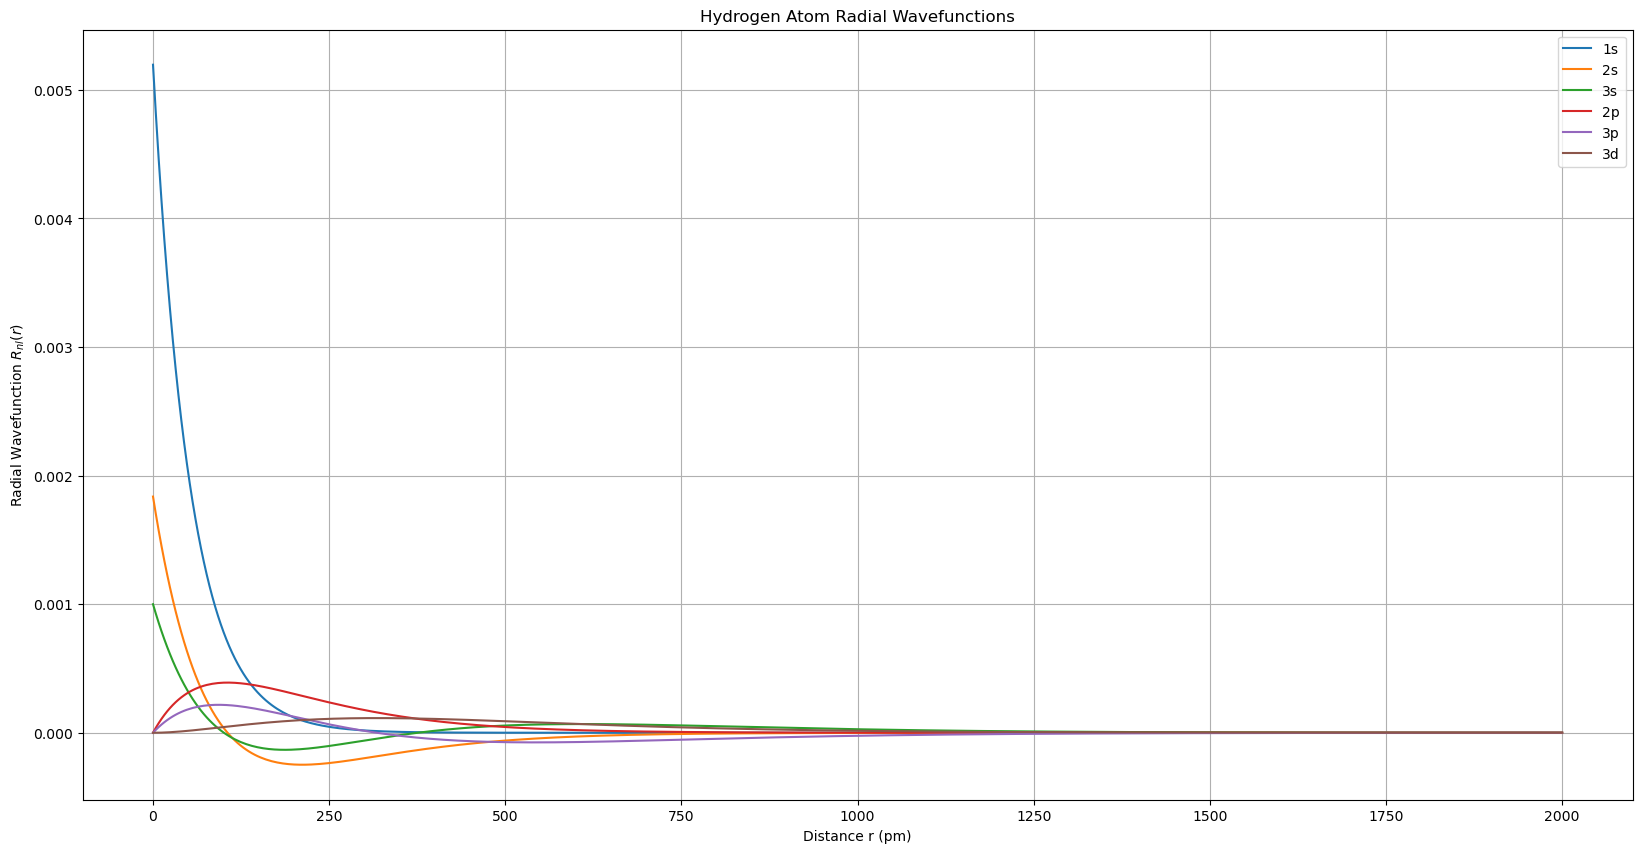

In [77]:
## Run this cell
r = np.linspace(0, 2000, 500)
# Compute radial wavefunctions
R_1s = radial_1s(r)
R_2s = radial_2s(r)
R_3s = radial_3s(r)
R_2p = radial_2p(r)
R_3p = radial_3p(r)
R_3d = radial_3d(r)

# Plot radial wavefunctions
plt.figure(figsize=(20, 10))
plt.plot(r, R_1s, label="1s")
plt.plot(r, R_2s, label="2s")
plt.plot(r, R_3s, label="3s")
plt.plot(r, R_2p, label="2p")
plt.plot(r, R_3p, label="3p")
plt.plot(r, R_3d, label="3d")
plt.xlabel("Distance r (pm)")
plt.ylabel("Radial Wavefunction $R_{nl}(r)$")
plt.title("Hydrogen Atom Radial Wavefunctions")
plt.legend()
plt.grid()
plt.show()

# 3. Angular Wavefuncions in Polar Coordinates

### 3.1. Angular Wavefuncions in Polar Coordinates: Mathematical Definitions

The angular wavefunctions $Y_{lm}(\theta, \phi)$ describe the angular dependence of the wavefunction for hydrogen orbitals. These depend on the angular momentum quantum numbers $l$ and $m_l$, and the spherical coordinates $\theta$ (polar angle) and $\phi$ (azimuthal angle).

#### Angular Wavefunctions
The following are the angular wavefunctions for selected hydrogen orbitals:

- **$s$ Orbital**
$$
Y_s(\theta, \phi) = \frac{1}{\sqrt{4\pi}}
$$
The $s$ orbital is spherically symmetric, meaning its angular component is independent of $\theta$ and $\phi$.

- **$p_x$ Orbital**
$$
Y_{p_x}(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \sin\theta \cos\phi
$$
The $p_x$ orbital has a directional dependence, with lobes along the $x$-axis determined by $\sin\theta$ and $\cos\phi$.

- **$d_{xy}$ Orbital**
$$
Y_{d_{xy}}(\theta, \phi) = \sqrt{\frac{15}{16\pi}} \sin^2\theta \sin(2\phi)
$$
The $d_{xy}$ orbital exhibits a cloverleaf shape in the $xy$-plane, influenced by $\sin^2\theta$ and $\sin(2\phi)$.

- **$d_{z^2}$ Orbital**
$$
Y_{d_{z^2}}(\theta, \phi) = \sqrt{\frac{5}{16\pi}} \left( 3\cos^2\theta - 1 \right)
$$
The $d_{z^2}$ orbital has a unique shape with a "donut-like" region around the $z$-axis, determined by $\cos^2\theta$.

#### Conversion to Cartesian Coordinates
To plot these angular wavefunctions in three dimensions, the spherical coordinates $(r, \theta, \phi)$ are converted to Cartesian coordinates $(x, y, z)$ using the following equations:

- **$x$-coordinate**
$$
x = r \sin\theta \cos\phi
$$

- **$y$-coordinate**
$$
y = r \sin\theta \sin\phi
$$

- **$z$-coordinate**
$$
z = r \cos\theta
$$

### Summary
- **Angular wavefunctions** define the shape and orientation of orbitals.
- **Cartesian conversion** allows visualization in 3D space by transforming spherical coordinates to Cartesian coordinates.


### 3.2. Angular Wavefuncions in Polar Coordinates: Python Implementation

In [40]:
# Define spherical harmonics
def angular_s(theta, phi):
    """Angular part of the s orbital"""
    return 1 / np.sqrt(4 * np.pi)

def angular_px(theta, phi):
    """Angular part of the p_x orbital"""
    return np.sqrt(3 / (4 * np.pi)) * np.sin(theta) * np.cos(phi)

def angular_dxy(theta, phi):
    """Angular part of the d_xy orbital"""
    return np.sqrt(15 / (16 * np.pi)) * np.sin(theta)**2 * np.sin(2 * phi)

def angular_dz2(theta, phi):
    """Angular part of the d_z^2 orbital"""
    return np.sqrt(5 / (16 * np.pi)) * (3 * np.cos(theta)**2 - 1)

# Convert to Cartesian coordinates for plotting
def to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

<div class=" alert alert-info">
    
## **What Does This Code Do?**

This code calculates the **angular wavefunctions** of hydrogen atom orbitals, which describe the shape and orientation of the "electron cloud" around the nucleus. These wavefunctions depend on the angles $\theta$ (polar) and $\phi$ (azimuthal), and they help us determine the specific patterns or lobes of electron probability in 3D space.

Think of the electron cloud as a 3D shape around the nucleus, where these angular wavefunctions determine:
- How the electron cloud spreads in different directions.
- The specific symmetries and shapes of orbitals like $s$, $p_x$, $d_{xy}$, and $d_{z^2}$.

The code also includes a conversion function to transform these angular patterns into Cartesian coordinates $(x, y, z)$, which are essential for plotting the shapes of orbitals in 3D space.
</div>

In [47]:
## Run this cell
# Define theta (0 to pi) and phi (0 to 2pi)
theta = np.linspace(0, np.pi, 100)  # polar angle
phi = np.linspace(0, 2 * np.pi, 100)  # azimuthal angle
theta, phi = np.meshgrid(theta, phi)

<div class=" alert alert-info">
    
## **What The Code Does**
-`theta`(Polar Angle): Ranges from 0 (north pole) to $\pi$ (south pole). This controls the "vertical" spread of the orbital.
- `phi` (Azimuthal Angle): Ranges from 0 to 2 $\pi$, covering a full circle around the z-axis. This controls the "horizontal" rotation of the orbital.
- `np.meshgrid`: Creates a grid of $\theta$ and $\phi$, so the wavefunctions can be evaluated at all combinations of these angles.
</div>

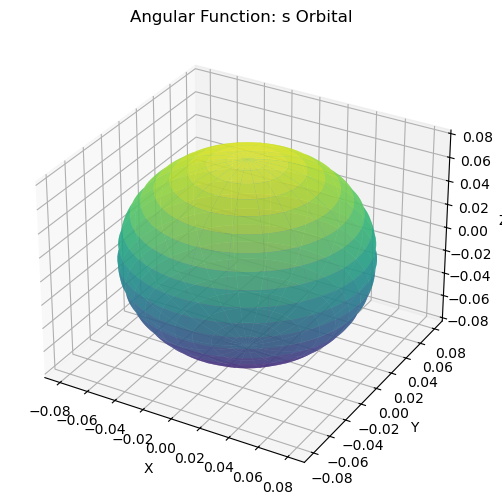

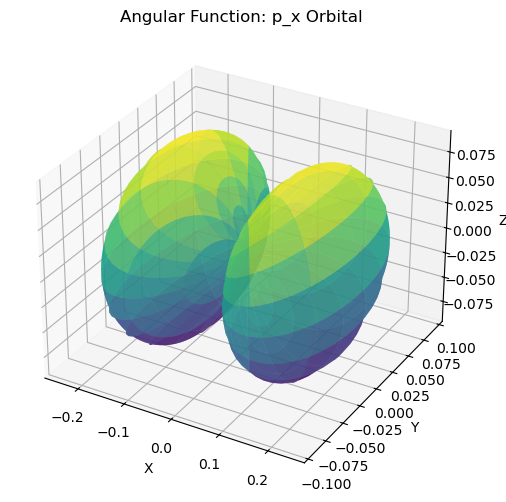

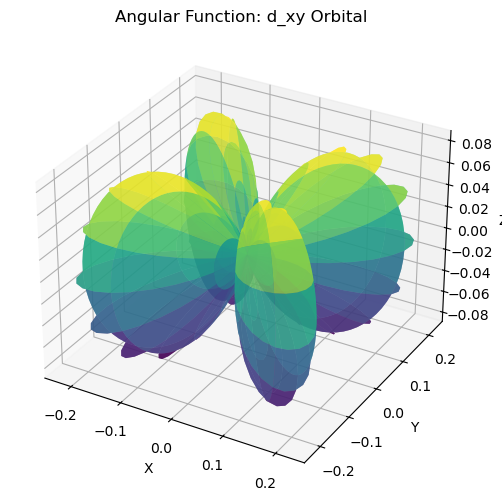

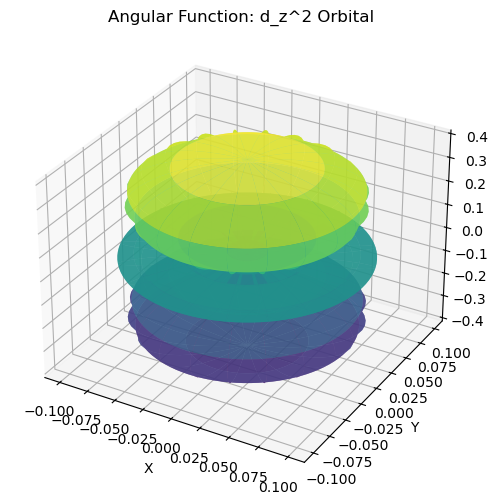

In [46]:
## Run this cell
# Angular functions and plotting
orbitals = {
    "s": angular_s(theta, phi),
    "p_x": angular_px(theta, phi),
    "d_xy": angular_dxy(theta, phi),
    "d_z^2": angular_dz2(theta, phi),
}

# Plot each orbital in 3D
for name, angular_func in orbitals.items():
    # Compute |Y|^2 (absolute value squared for visualization)
    r = np.abs(angular_func)**2
    x, y, z = to_cartesian(r, theta, phi)
    
    # Plot in 3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.7, cmap='viridis')
    ax.set_title(f"Angular Function: {name} Orbital")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

-------------
# Congratulations! You Have Completed the Notebook!<a id='0'></a>